### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data Import

In [2]:
data_frame = pd.read_csv('child_depression.csv')
data_frame.head()

,Child_ID,Age,Sadness,Loss of interest,Fatigue,Changes in sleep,Changes in appetite,Difficulty concentrating,Feelings of guilt,Thoughts of death,Irritability,Moodiness,Clinginess,Overly sensitive,Reactive,Aches and pains,Non-specific physical discomfort,Depression
0,CH0000,16,0,3,0,0,1,0,1,0,2,2,2,1,3,3,3,1
1,CH0001,9,3,2,2,1,0,2,3,3,0,0,1,1,0,3,1,1
2,CH0002,4,1,0,1,3,2,1,2,0,1,0,0,0,3,0,1,0
3,CH0003,7,3,0,2,1,1,2,2,2,2,3,0,0,3,2,0,1
4,CH0004,15,0,1,2,2,1,3,0,1,0,3,2,3,0,2,0,1


In [3]:
data_frame.describe()

,Age,Sadness,Loss of interest,Fatigue,Changes in sleep,Changes in appetite,Difficulty concentrating,Feelings of guilt,Thoughts of death,Irritability,Moodiness,Clinginess,Overly sensitive,Reactive,Aches and pains,Non-specific physical discomfort,Depression
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,10.990400,1.465600,1.506800,1.504000,1.512600,1.471400,1.493200,1.490200,1.503400,1.4704,1.516800,1.486000,1.530600,1.505600,1.527600,1.524600,0.91320
std,4.329487,1.119047,1.114003,1.121354,1.113593,1.119568,1.114541,1.111283,1.123139,1.1165,1.114974,1.113217,1.121301,1.128638,1.116731,1.117338,0.28157
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000
50%,11.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.0000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.00000
75%,15.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.0000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.00000
max,18.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.00000


In [4]:
data_frame.dtypes

Child_ID                            object
Age                                  int64
Sadness                              int64
Loss of interest                     int64
Fatigue                              int64
Changes in sleep                     int64
Changes in appetite                  int64
Difficulty concentrating             int64
Feelings of guilt                    int64
Thoughts of death                    int64
Irritability                         int64
Moodiness                            int64
Clinginess                           int64
Overly sensitive                     int64
Reactive                             int64
Aches and pains                      int64
Non-specific physical discomfort     int64
Depression                           int64
dtype: object

### Checking Null Columns

In [5]:
null_counts = data_frame.isnull().sum()
print(null_counts)

Child_ID                            0
Age                                 0
Sadness                             0
Loss of interest                    0
Fatigue                             0
Changes in sleep                    0
Changes in appetite                 0
Difficulty concentrating            0
Feelings of guilt                   0
Thoughts of death                   0
Irritability                        0
Moodiness                           0
Clinginess                          0
Overly sensitive                    0
Reactive                            0
Aches and pains                     0
Non-specific physical discomfort    0
Depression                          0
dtype: int64


### Check the Target Distribution

In [6]:
# Percentage of each class
depression_counts = data_frame['Depression'].value_counts(normalize=True) * 100
print(f"Class Distribution:\n{depression_counts}")

Class Distribution:
Depression
1    91.32
0     8.68
Name: proportion, dtype: float64


### Drop id Column


In [7]:
data_frame = data_frame.drop('Child_ID',axis=1)

### Hybrid Sampling

In [8]:
from collections import Counter
from imblearn.combine import SMOTEENN
import pandas as pd

# Separate input features (X) and target variable (y)
X = data_frame.drop('Depression', axis=1)
y = data_frame['Depression']

# Apply SMOTEENN for hybrid sampling
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Check the new class distribution
print(f"Resampled class distribution: {Counter(y_resampled)}")

# Combine the resampled features and target back into a data_frame
data_frame = pd.concat([X_resampled, pd.Series(y_resampled, name='Depression')],axis=1)

Resampled class distribution: Counter({0: 4564, 1: 3852})


### Check the Feature Distribution

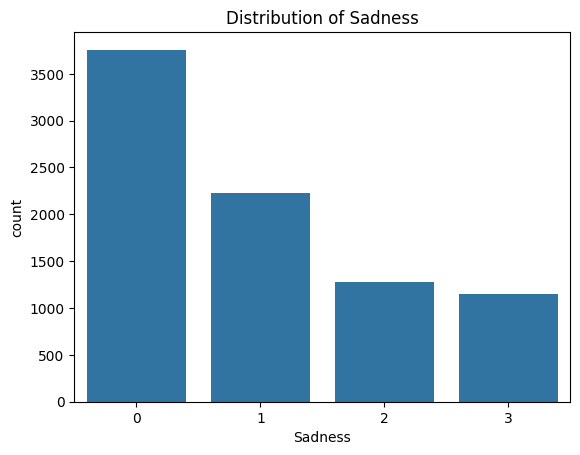

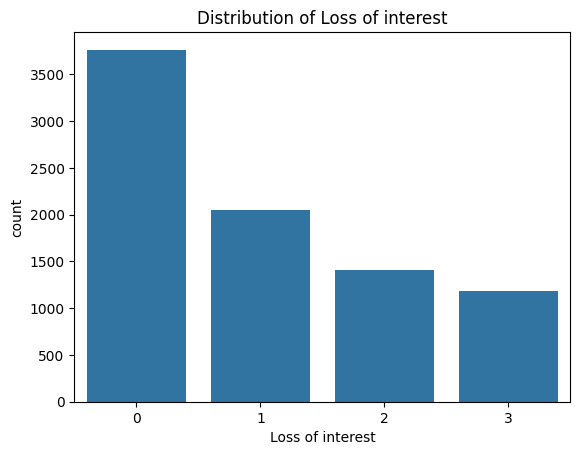

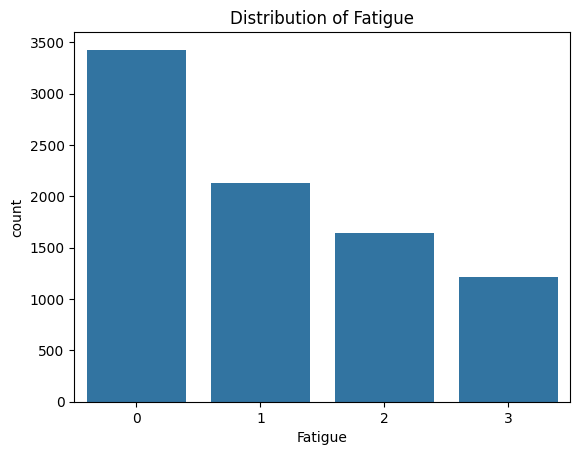

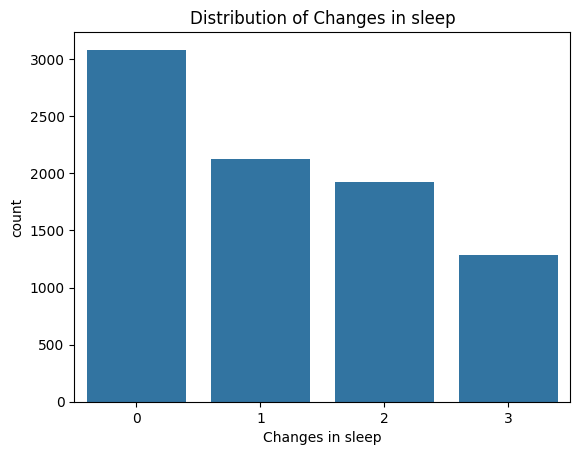

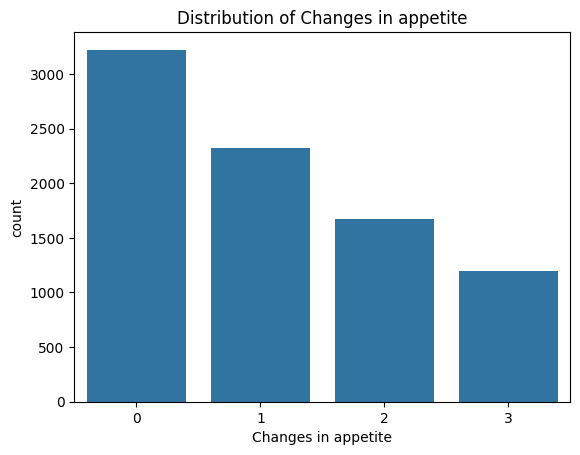

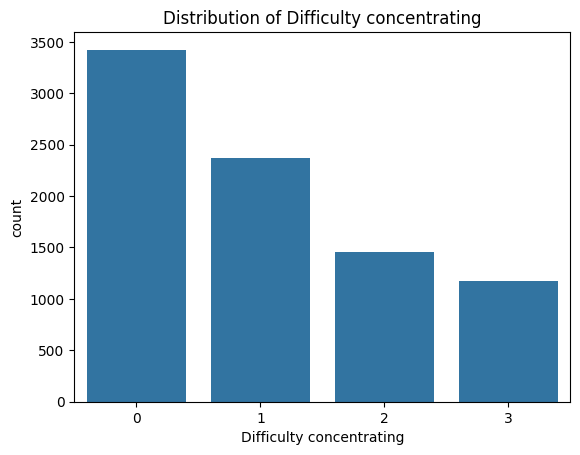

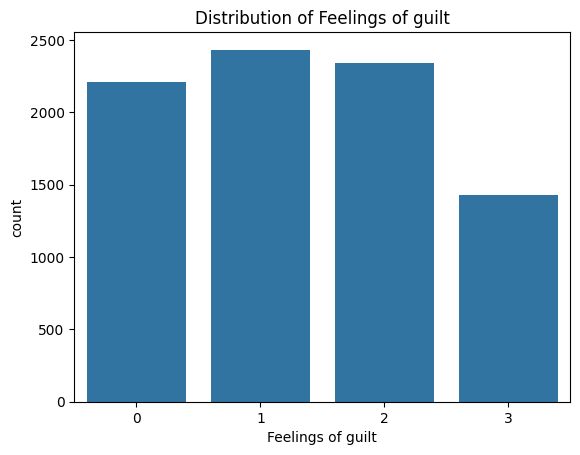

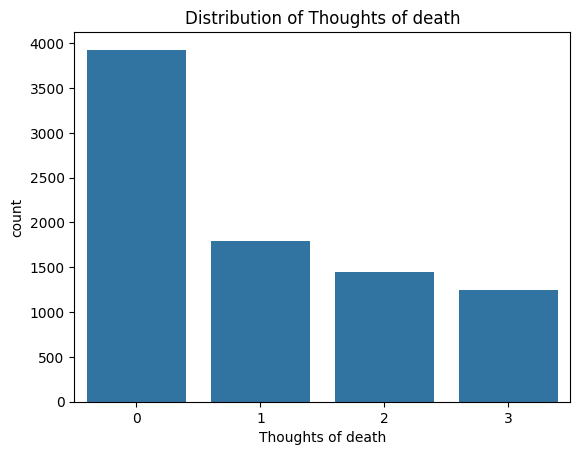

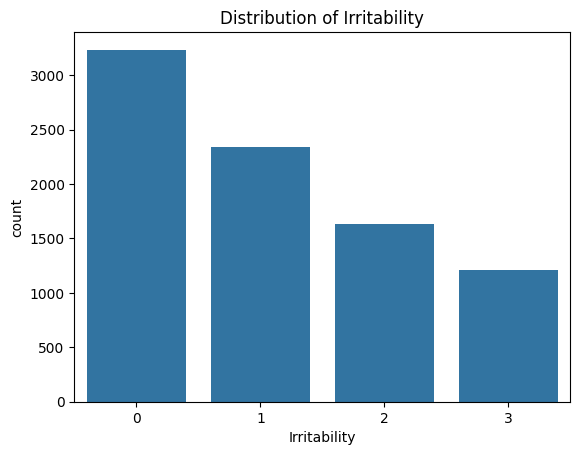

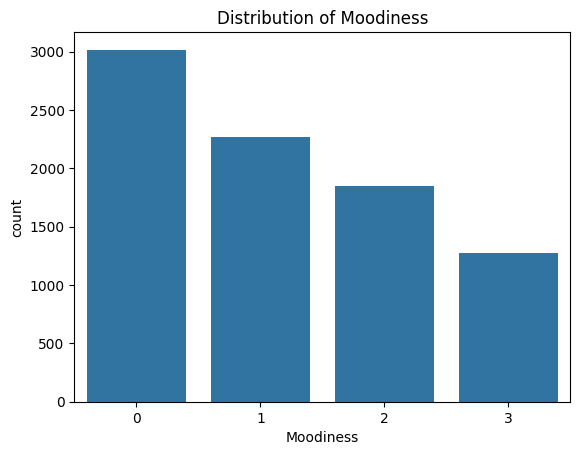

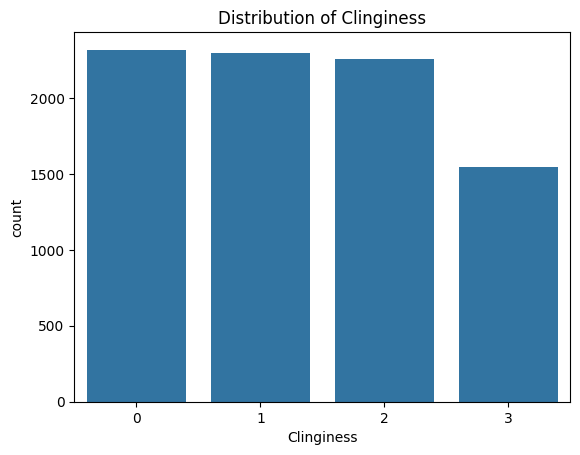

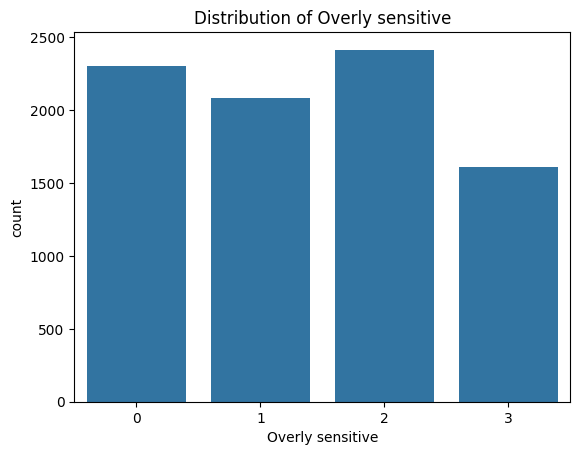

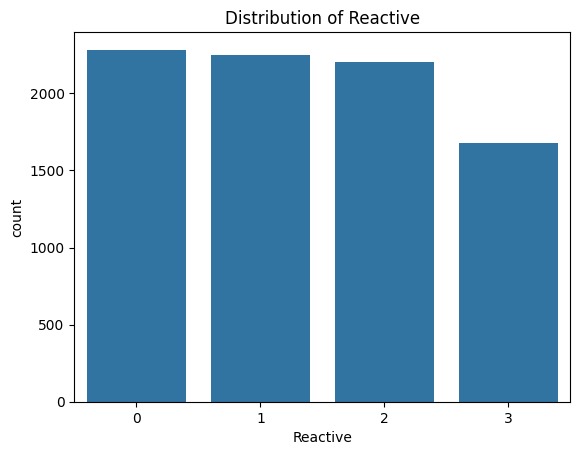

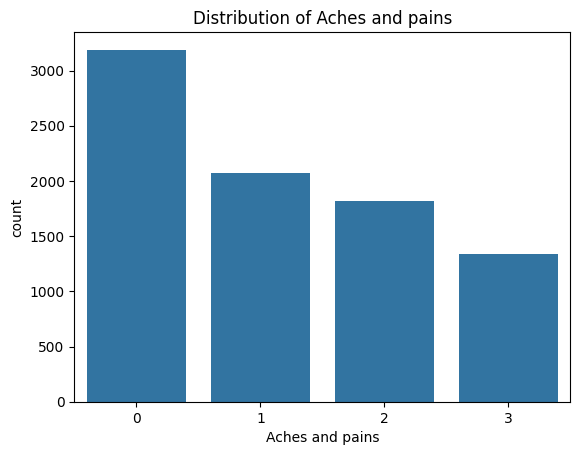

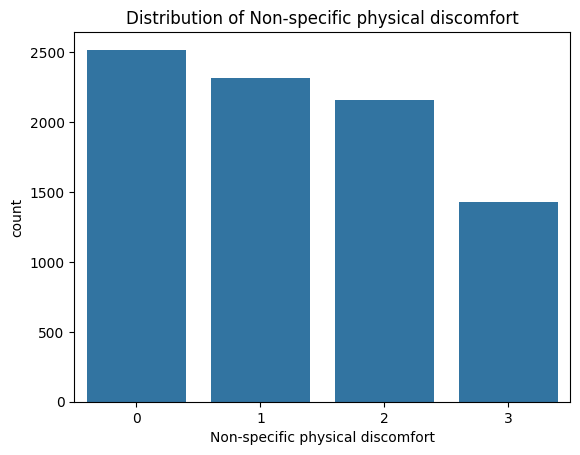

In [9]:
# Plot distribution of categorical features
categorical_features = ['Sadness', 'Loss of interest', 'Fatigue', 'Changes in sleep', 'Changes in appetite', 'Difficulty concentrating',
                        'Feelings of guilt', 'Thoughts of death', 'Irritability', 'Moodiness', 'Clinginess', 'Overly sensitive',
                        'Reactive', 'Aches and pains', 'Non-specific physical discomfort']
for feature in categorical_features:
    sns.countplot(x=feature, data=data_frame)
    plt.title(f'Distribution of {feature}')
    plt.show()

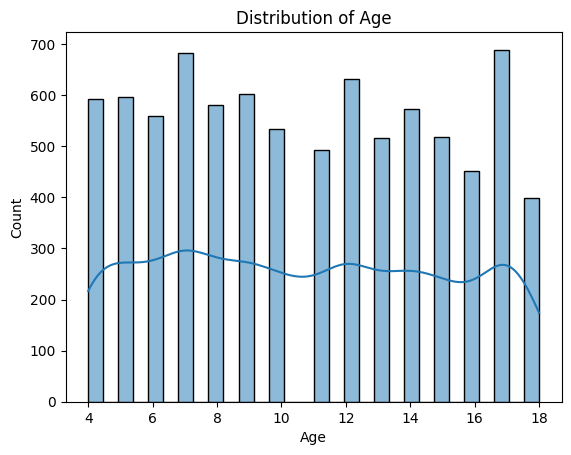

In [10]:
# Plot distribution of numerical features
numerical_features = ['Age']
for feature in numerical_features:
    sns.histplot(data_frame[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Correlation Matrix

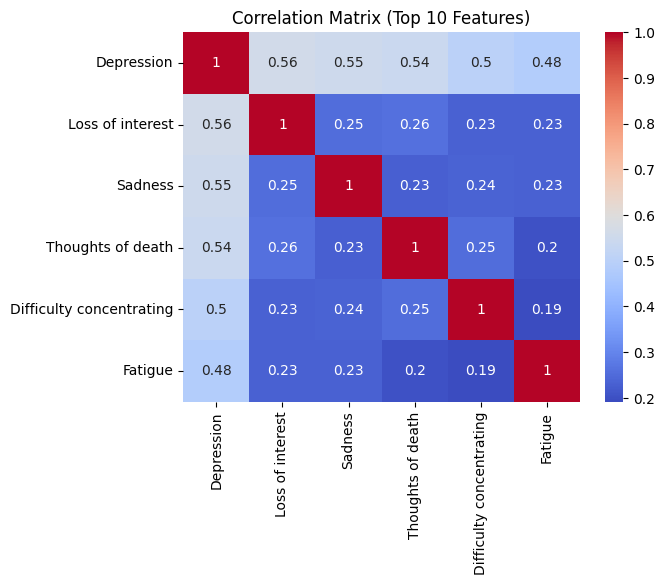

Loss of interest                    0.558966
Sadness                             0.551363
Thoughts of death                   0.540652
Difficulty concentrating            0.502707
Fatigue                             0.483196
Irritability                        0.405117
Changes in appetite                 0.404851
Aches and pains                     0.398936
Moodiness                           0.370356
Changes in sleep                    0.365885
Non-specific physical discomfort    0.228336
Feelings of guilt                   0.134074
Overly sensitive                    0.125309
Clinginess                          0.106113
Reactive                            0.103832
Age                                 0.071719
Name: Depression, dtype: float64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data_frame.corr()

# Get the top 10 features most correlated with 'Depression'
top_corr_features = corr_matrix['Depression'].abs().sort_values(ascending=False).head(6).index

# Generate the heatmap for these top features
top_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Top 10 Features)')
plt.show()

# Print the top 10 features' correlation with 'Depression'
top_10_corr = corr_matrix['Depression'].abs().sort_values(ascending=False).iloc[1:]
print(top_10_corr)



## Model Selection

In [12]:
data_frame.replace({True: 1, False: 0}, inplace=True)
data_frame.head()

,Age,Sadness,Loss of interest,Fatigue,Changes in sleep,Changes in appetite,Difficulty concentrating,Feelings of guilt,Thoughts of death,Irritability,Moodiness,Clinginess,Overly sensitive,Reactive,Aches and pains,Non-specific physical discomfort,Depression
0,4,1,0,1,3,2,1,2,0,1,0,0,0,3,0,1,0
1,7,0,0,0,0,0,1,2,0,3,0,0,2,3,1,3,0
2,6,0,1,1,0,1,0,2,0,1,3,2,0,1,3,0,0
3,12,1,0,2,2,1,1,1,1,2,0,0,2,2,0,0,0
4,7,0,2,0,3,0,0,2,0,2,0,0,3,2,3,2,0


In [13]:
# Split the dataset into features (X) and target (y)
X = data_frame.drop(columns=['Depression'])
y = data_frame['Depression']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = logreg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       771

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684

ROC-AUC Score: 1.0


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       913
           1       0.98      1.00      0.99       771

    accuracy                           0.99      1684
   macro avg       0.99      0.99      0.99      1684
weighted avg       0.99      0.99      0.99      1684

ROC-AUC Score: 0.9998529668727971


### XGBoost

In [18]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = xgb_model.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       913
           1       0.99      0.99      0.99       771

    accuracy                           0.99      1684
   macro avg       0.99      0.99      0.99      1684
weighted avg       0.99      0.99      0.99      1684

ROC-AUC Score: 0.9998849305961022


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [03:06:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### LightBGM

In [19]:
import lightgbm as lgb

# LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = lgb_model.predict(X_test)
print("LightGBM Performance:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1]))

[LightGBM] [Info] Number of positive: 3081, number of negative: 3651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 6732, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457665 -> initscore=-0.169747
[LightGBM] [Info] Start training from score -0.169747
LightGBM Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       913
           1       0.99      1.00      0.99       771

    accuracy                           0.99      1684
   macro avg       0.99      0.99      0.99      1684
weighted avg       0.99      0.99      0.99      1684

ROC-AUC Score: 0.9998494153479855


### Fully Connected Neural Network

In [20]:
import torch
import torch.nn as nn

In [21]:
# Convert the dataset to tensor format
X_tr_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tr_tensor = torch.tensor(y_train, dtype=torch.long)

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

class FullyConnectedNN(nn.Module):
    def __init__(self):
        super(FullyConnectedNN, self).__init__()

        # First Layer
        self.layer_1 = nn.Linear(16, 30)
        self.activation_1 = nn.ReLU()

        # Second Layer
        self.layer_2 = nn.Linear(30, 60)
        self.activation_2 = nn.ReLU()

        # # Third Layer: Hidden layer with 128 inputs and 64 neurons
        # self.layer_3 = nn.Linear(128, 64)
        # self.activation_3 = nn.ReLU()

        # # Fourth Layer: Hidden layer with 64 inputs and 32 neurons
        # self.layer_4 = nn.Linear(64, 32)
        # self.activation_4 = nn.ReLU()

        # Fifth Layer: Output layer with 32 inputs and 2 outputs
        self.layer_5 = nn.Linear(60, 2)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.activation_1(x)

        x = self.layer_2(x)
        x = self.activation_2(x)

        # x = self.layer_3(x)
        # x = self.activation_3(x)

        # x = self.layer_4(x)
        # x = self.activation_4(x)

        x = self.layer_5(x)
        return x

# Instantiate the model
model = FullyConnectedNN()

# Define the optimizer (Adam) and the loss function (CrossEntropyLoss for multi-class classification)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Example forward pass (just to illustrate how you'd use the model)
input_data = torch.randn(1, 16)  # Example input tensor with 16 features
output = model(input_data)

print(output)

tensor([[-0.0155,  0.0361]], grad_fn=<AddmmBackward0>)


In [23]:
import torch

def train_model(model, criterion, optimizer, X_train, y_train, epochs=80, batch_size=10):
    # Convert the dataset to tensor format
    X_tr_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_tr_tensor = torch.tensor(y_train, dtype=torch.long)

    # Set the model to training mode
    model.train()

    for epoch in range(epochs):
        epoch_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        # Training loop
        for i in range(0, len(X_tr_tensor), batch_size):
            # Get the mini-batch of data
            X_batch = X_tr_tensor[i:i+batch_size]
            y_batch = y_tr_tensor[i:i+batch_size]

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(X_batch)

            # Calculate loss
            loss = criterion(outputs, y_batch)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Accumulate the loss
            epoch_loss += loss.item()

            # Calculate the accuracy
            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == y_batch).sum().item()
            total_predictions += y_batch.size(0)

        # Compute the average loss and accuracy for the epoch
        epoch_loss /= len(X_tr_tensor)
        accuracy = correct_predictions / total_predictions

        # Print the epoch, loss, and accuracy
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy*100:.2f}%')

def save_model():
    # Save the trained model
    torch.save(model.state_dict(), "model.pkl")
    print("Model saved successfully!")


In [24]:
# Call the training function with your train data
train_model(model, criterion, optimizer, X_train, y_train, epochs=20, batch_size=10)

# Save the trained model
save_model()

Epoch [1/20], Loss: 0.0069, Accuracy: 98.08%
Epoch [2/20], Loss: 0.0008, Accuracy: 99.69%
Epoch [3/20], Loss: 0.0005, Accuracy: 99.85%
Epoch [4/20], Loss: 0.0003, Accuracy: 99.91%
Epoch [5/20], Loss: 0.0002, Accuracy: 99.97%
Epoch [6/20], Loss: 0.0001, Accuracy: 100.00%
Epoch [7/20], Loss: 0.0001, Accuracy: 99.96%
Epoch [8/20], Loss: 0.0003, Accuracy: 99.85%
Epoch [9/20], Loss: 0.0002, Accuracy: 99.91%
Epoch [10/20], Loss: 0.0002, Accuracy: 99.93%
Epoch [11/20], Loss: 0.0001, Accuracy: 99.97%
Epoch [12/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [13/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [14/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [15/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [16/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [17/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [18/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [19/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [20/20], Loss: 0.0000, Accuracy: 100.00%
Model saved successfully!


In [25]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_pred = model(X_test_tensor)
y_test_pred = torch.argmax(y_test_pred, dim=1)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

print("Accuracy:", accuracy_score(y_test_pred, y_test))

Accuracy: 0.9982185273159145


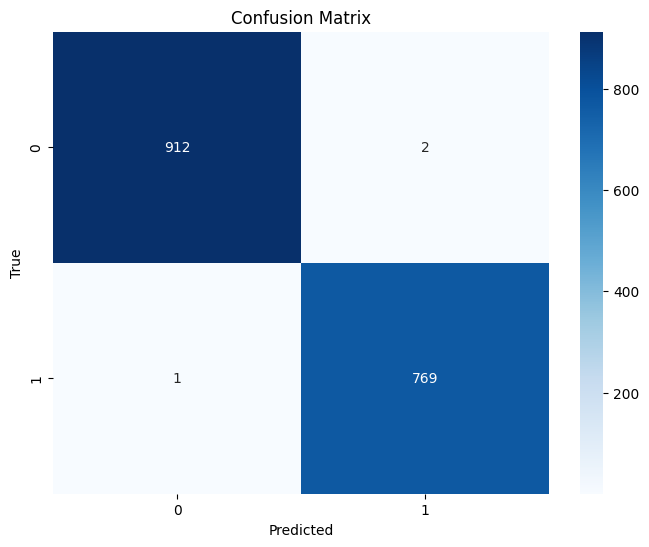

In [27]:
confused_matrix = confusion_matrix(y_test_pred, y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
def load_and_predict(model_path, X_input):
    # Instantiate the model
    model = FullyConnectedNN()

    # Load the saved model state dictionary
    model.load_state_dict(torch.load(model_path))

    # Set the model to evaluation mode
    model.eval()

    # Convert the input data to a tensor if it's not already
    if not isinstance(X_input, torch.Tensor):
        X_input = torch.tensor(X_input, dtype=torch.float32)

    # Make predictions
    with torch.no_grad():  # No need to track gradients for prediction
        y_pred = model(X_input)
        y_pred = torch.argmax(y_pred, dim=1)

    y_pred_str = y_pred.item() if y_pred.numel() == 1 else y_pred.tolist()

    return str(y_pred_str)

In [29]:
# Example usage:
# Path to the saved model file
model_path = "model.pkl"

# Example input data (replace with your actual test data)
X_test = [[8, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]]

# Make predictions
predictions = load_and_predict(model_path, X_test)
print(predictions)

1


In [30]:
from flask import Flask, request, jsonify
from flask_cors import CORS

app = Flask(__name__)
CORS(app)  # This will enable CORS for all routes

# Load the model (ensure it's saved in the Colab environment)
model_path = "model.pkl"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    X_input = [data]
    predictions = load_and_predict(model_path, X_input)
    print(predictions)
    return jsonify(predictions)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Sep/2024 03:10:44] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2024 03:10:44] "POST /predict HTTP/1.1" 200 -


1


127.0.0.1 - - [28/Sep/2024 03:30:02] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:30:03] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:43:57] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:43:57] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:43:58] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:43:59] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:44:00] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:44:02] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:44:03] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:44:04] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:44:05] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:44:06] "OPTIONS /predict_emotion HTTP/1.1" 404 -
127.0.0.1 - - [28/Sep/2024 03:44:07] "OPTIONS /predi